In [1]:
import numpy as np 
import pandas as pd
import scanpy as sc
import seaborn as sns

In [2]:
def saveWithPickle(obj, PATH_out, filename="saveWithPickle"):
    import pickle
    with open(f'{PATH_out}/{filename}.pickle', 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def loadFromPickle(dir_pickle):
    import pickle
    with open(dir_pickle, 'rb') as handle:
        unserialized_pickle = pickle.load(handle)
    return unserialized_pickle

In [3]:
adata_chen = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/Chen.MSI.preprocessed.NanoMnT.ManualAnnot.h5ad')

## Simplify Author annotations

In [4]:
dict_Identifier_to_lvl_1b_CellType = dict()
dict_Identifier_to_lvl_2b_CellType = dict()

In [5]:
adata_chen_TME = adata_chen[adata_chen.obs['Manual_CellType_lvl_1']!='Tumor epithelial'].copy()
adata_chen_TME = adata_chen_TME.raw.to_adata()

In [43]:
sc.pp.normalize_total(adata_chen_TME)
sc.pp.log1p(adata_chen_TME)

In [109]:
dict_AuthorCellType_to_nCells = dict()
for CellType, edf in adata_chen_TME.obs.groupby('Author_CellType_lvl_2'):
    # print(CellType, len(edf))
    dict_AuthorCellType_to_nCells[CellType] = len(edf)
dict_AuthorCellType_to_nCells = dict(sorted(dict_AuthorCellType_to_nCells.items(), key=lambda x:x[1]))

l = list()
for k, v in dict_AuthorCellType_to_nCells.items():
    if v<=20:
        print(k, v)
        l.append(k)

sorted(l)

c56_tDC_SIGLEC6 1
c36_ILC_SYNE2 2
c54_pDC_LILRA4 2
c66_Endo_LYVE1 2
c35_ILC_FCGR3A 3
c51_Mono_NFKBIZ 3
c76_Fibro_PI16 3
c26_CD8_MAIT_KLRB1 5
c50_Mono_FCGR3A 7
c58_cDC_CD1C 8
c78_Fibro_DES 10
c80_Fibro_MKI67 11
c10_CD4_Temra_GZMB 14
c49_Mono_CD14 14
c02_CD4_Tn_SELL 16
c33_ILC_GZMK 17


/tmp/ipykernel_162475/1088667562.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for CellType, edf in adata_chen_TME.obs.groupby('Author_CellType_lvl_2'):


['c02_CD4_Tn_SELL',
 'c10_CD4_Temra_GZMB',
 'c26_CD8_MAIT_KLRB1',
 'c33_ILC_GZMK',
 'c35_ILC_FCGR3A',
 'c36_ILC_SYNE2',
 'c49_Mono_CD14',
 'c50_Mono_FCGR3A',
 'c51_Mono_NFKBIZ',
 'c54_pDC_LILRA4',
 'c56_tDC_SIGLEC6',
 'c58_cDC_CD1C',
 'c66_Endo_LYVE1',
 'c76_Fibro_PI16',
 'c78_Fibro_DES',
 'c80_Fibro_MKI67']

In [158]:
dict_AuthorCellType_to_lvl_1b_CellType = {
    'c01_CD4_Tn_CCR7' : 'CD4+ T',
    'c02_CD4_Tn_SELL' : 'CD4+ T',
    'c03_CD4_Tn_NR4A2' : 'CD4+ T',
    'c04_CD4_Tcm_ANXA1' : 'CD4+ T',
    'c05_CD4_Tcm_GPR183' : 'CD4+ T',
    'c06_CD4_Trm_HSPA1A' : 'CD4+ T',
    'c07_CD4_Th17_CTSH' : 'CD4+ T',
    'c08_CD4_Tfh_CXCL13_IL6ST' : 'CD4+ T',
    'c09_CD4_Th1_CXCL13_HAVCR2' : 'CD4+ T',
    'c10_CD4_Temra_GZMB' : 'CD4+ T',
    'c11_CD4_Treg_FOXP3' : 'CD4+ T',
    'c12_CD4_Treg_KLRB1' : 'CD4+ T',
    'c13_CD4_Treg_TNFRSF9' : 'CD4+ T',
    'c14_CD4_MT' : 'CD4+ T',
    'c15_CD8_Tn_CCR7' : 'CD8+ T',
    'c16_CD8_Tn_SELL' : 'CD8+ T',
    'c17_CD8_Tcm_GPR183' : 'CD8+ T',
    'c18_CD8_Tcm_ANXA1' : 'CD8+ T',
    'c19_CD8_Tem_CMC1' : 'CD8+ T',
    'c20_CD8_Tem_GZMK' : 'CD8+ T',
    'c21_CD8_Trm_XCL1' : 'CD8+ T',
    'c22_CD8_Trm_HSPA1B' : 'CD8+ T',
    'c23_CD8_Tex_LAYN' : 'CD8+ T',
    'c24_CD8_Temra_CX3CR1' : 'CD8+ T',
    'c25_CD8_Temra_TYROBP' : 'CD8+ T',
    'c26_CD8_MAIT_KLRB1' : 'N/A',   #! Low cell count
    'c27_CD8_MAIT_SLC4A10' : 'CD8+ T',
    'c28_CD8_IEL_CD160' : 'CD8+ T',
    'c29_T_MKI67' : 'T',
    'c30_gdT_TRDV2' : 'gd T',
    'c31_DNT' : 'T',
    'c33_ILC_GZMK' : 'ILC',
    'c34_ILC_NR4A2' : 'ILC',
    'c35_ILC_FCGR3A' : 'N/A',   #! Low cell count   
    'c36_ILC_SYNE2' : 'N/A',    #! Low cell count
    'c37_ILC_SLC4A10' : 'ILC',
    'c38_ILC_MKI67' : 'ILC',
    'c39_NaiveB_TCL1A' : 'B',
    'c40_NaiveB_IGHD' : 'B',
    'c41_MemB_CD27' : 'B',
    'c42_MemB_GPR183' : 'B',
    'c43_GCB_LRMP' : 'B',
    'c44_GCB_MKI67' : 'B',
    'c45_PlasmaB_TXNDC5' : 'Plasma',
    'c46_PlasmaB_IGHA1' : 'Plasma',
    'c47_PlasmaB_IGHG1' : 'Plasma',
    'c48_PlasmaB_MKI67' : 'Plasma',
    'c49_Mono_CD14' : 'Monocyte',
    'c50_Mono_FCGR3A' : 'N/A',  #! Low cell count
    'c51_Mono_NFKBIZ' : 'N/A',  #! Low cell count
    'c52_Mast_TPSAB1' : 'Mast',
    'c53_Neu_CXCR2' : 'Neutrophil',
    'c54_pDC_LILRA4' : 'N/A',   #! Low cell count
    'c55_pDC_GZMB' : 'DC',
    'c56_tDC_SIGLEC6' : 'N/A',  #! Low cell count
    'c57_cDC_CLEC9A' : 'DC',
    'c58_cDC_CD1C' : 'N/A',     #! Low cell count
    'c59_cDC_IL1B' : 'DC',
    'c60_cDC_LAMP3' : 'DC',
    'c61_Mph_FCGR3A' : 'Macrophage',
    'c62_Mph_S100A8' : 'Macrophage',
    'c63_Mph_CCL20' : 'Macrophage',
    'c64_Mph_SPP1' : 'Macrophage',
    'c65_Mph_APOE' : 'Macrophage',
    'c66_Endo_LYVE1' : 'N/A',   #! Low cell count
    'c67_Endo_ACKR1' : 'Endothelial',
    'c68_Endo_FABP5' : 'Endothelial',
    'c69_Endo_CXCL12' : 'Endothelial',
    'c70_Endo_COL4A1' : 'Endothelial',
    'c71_Endo_MKI67' : 'Endothelial',
    'c72_Fibro_SOX6' : 'Fibroblast',
    'c73_Fibro_ADAMDEC1' : 'Fibroblast',
    'c74_Fibro_C7' : 'Fibroblast',
    'c75_Fibro_CCL19' : 'Fibroblast',
    'c76_Fibro_PI16' : 'N/A',   #! Low cell count
    'c77_Fibro_ACTA2' : 'Fibroblast',
    'c78_Fibro_DES' : 'N/A',    #! Low cell count
    'c79_Fibro_FAP' : 'Fibroblast',
    'c80_Fibro_MKI67' : 'Fibroblast',
    'c81_Pericyte_RGS5' : 'Pericyte',
    'c82_SMC_MYH11' : 'SMC',
    'c83_Glia_PLP1' : 'Glial',
    'c84_Coloncyte_CA2' : 'Enterocyte',
    'c85_Coloncyte_SLC26A3' : 'Enterocyte',
    'c86_Coloncyte_BEST4' : 'Enterocyte',
    'c87_Goblet_MUC2' : 'Goblet',
    'c88_EEC_PCSK1N' : 'Enteroendocrine',
    'c89_Tuft_PTGS1' : 'Tuft',
    'c90_Epi_MKI67' : 'Intestinal stem',
    'c91_Epi_Tumor' : 'Intestinal stem',
}

In [149]:
dict_AuthorCellType_to_lvl_2b_CellType = {
    
    'c01_CD4_Tn_CCR7' : 'CD4+ Tn',
    'c02_CD4_Tn_SELL' : 'CD4+ Tn',
    'c03_CD4_Tn_NR4A2' : 'CD4+ Tn',
    'c04_CD4_Tcm_ANXA1' : 'CD4+ Tcm',   # Central memory
    'c05_CD4_Tcm_GPR183' : 'CD4+ Tcm',  # Central memory
    'c06_CD4_Trm_HSPA1A' : 'CD4+ Trm',  # Tissue-resident memory 
    'c07_CD4_Th17_CTSH' : 'CD4+ Th17',  # Helper 17
    'c08_CD4_Tfh_CXCL13_IL6ST' : 'CD4+ Tfh', # Follicular helper
    'c09_CD4_Th1_CXCL13_HAVCR2' : 'CD4+ Th1',
    'c10_CD4_Temra_GZMB' : 'CD4+ Temra', # Effective memory re-expressing CD45RA
    'c11_CD4_Treg_FOXP3' : 'CD4+ Treg',
    'c12_CD4_Treg_KLRB1' : 'CD4+ Treg',
    'c13_CD4_Treg_TNFRSF9' : 'CD4+ Treg',
    'c14_CD4_MT' : 'CD4+ Tm',   # Memory T?
    
    'c15_CD8_Tn_CCR7' : 'CD8+ Tn',
    'c16_CD8_Tn_SELL' : 'CD8+ Tn',
    'c17_CD8_Tcm_GPR183' : 'CD8+ Tcm',
    'c18_CD8_Tcm_ANXA1' : 'CD8+ Tcm',
    'c19_CD8_Tem_CMC1' : 'CD8+ Tem',
    'c20_CD8_Tem_GZMK' : 'CD8+ Tcm',
    'c21_CD8_Trm_XCL1' : 'CD8+ Trm',
    'c22_CD8_Trm_HSPA1B' : 'CD8+ Trm',
    'c23_CD8_Tex_LAYN' : 'CD8+ Tex',
    'c24_CD8_Temra_CX3CR1' : 'CD8+ Temra',
    'c25_CD8_Temra_TYROBP' : 'CD8+ Temra',
    'c26_CD8_MAIT_KLRB1' : 'N/A',     #! Low cell count
    'c27_CD8_MAIT_SLC4A10' : 'CD8+ MAIT',
    'c28_CD8_IEL_CD160' : 'CD8+ IEL',
    'c29_T_MKI67' : 'CD8+ Proliferating T',
    'c30_gdT_TRDV2' : 'γδ2+ T',
    'c31_DNT' : 'CD4-CD8- T',
    
    'c33_ILC_GZMK' : 'ILC',
    'c34_ILC_NR4A2' : 'ILC',
    'c35_ILC_FCGR3A' : 'N/A',   #! Low cell count
    'c36_ILC_SYNE2' : 'N/A',    #! Low cell count
    'c37_ILC_SLC4A10' : 'ILC',
    'c38_ILC_MKI67' : 'ILC',
    
    'c39_NaiveB_TCL1A' : 'Naive B',
    'c40_NaiveB_IGHD' : 'Naive B',
    'c41_MemB_CD27' : 'Memory B',
    'c42_MemB_GPR183' : 'Memory B',
    'c43_GCB_LRMP' : 'GC B',
    'c44_GCB_MKI67' : 'GC B',
    'c45_PlasmaB_TXNDC5' : 'IGHA+ Plasma',  #! Confirmed IGHA expression
    'c46_PlasmaB_IGHA1' : 'IGHA+ Plasma',   #! Confirmed IGHA expression
    'c47_PlasmaB_IGHG1' : 'IGHG+ Plasma',
    'c48_PlasmaB_MKI67' : 'IGHA+ Plasma',
    
    'c49_Mono_CD14' : 'Monocyte',
    'c50_Mono_FCGR3A' : 'N/A',  #! Low cell count
    'c51_Mono_NFKBIZ' : 'N/A',  #! Low cell count
    'c52_Mast_TPSAB1' : 'Mast',
    'c53_Neu_CXCR2' : 'Neutrophil',
    'c54_pDC_LILRA4' : 'N/A',   #! Low cell count
    'c55_pDC_GZMB' : 'pDC',
    'c56_tDC_SIGLEC6' : 'N/A',  #! Low cell count
    'c57_cDC_CLEC9A' : 'cDC',
    'c58_cDC_CD1C' : 'N/A',     #! Low cell count
    'c59_cDC_IL1B' : 'cDC',
    'c60_cDC_LAMP3' : 'cDC',
    
    'c61_Mph_FCGR3A' : 'Macrophage',
    'c62_Mph_S100A8' : 'Macrophage',
    'c63_Mph_CCL20' : 'Macrophage',
    'c64_Mph_SPP1' : 'Macrophage',
    'c65_Mph_APOE' : 'Macrophage',
    
    'c66_Endo_LYVE1' : 'N/A',   #! Low cell count
    'c67_Endo_ACKR1' : 'Endothelial',
    'c68_Endo_FABP5' : 'Endothelial',
    'c69_Endo_CXCL12' : 'Endothelial',
    'c70_Endo_COL4A1' : 'Endothelial',
    'c71_Endo_MKI67' : 'Endothelial',
    
    'c72_Fibro_SOX6' : 'Fibroblast',
    'c73_Fibro_ADAMDEC1' : 'Fibroblast',
    'c74_Fibro_C7' : 'Fibroblast',
    'c75_Fibro_CCL19' : 'Fibroblast',
    'c76_Fibro_PI16' : 'N/A',   #! Low cell count
    'c77_Fibro_ACTA2' : 'Fibroblast',
    'c78_Fibro_DES' : 'N/A',    #! Low cell count
    'c79_Fibro_FAP' : 'Fibroblast',
    'c80_Fibro_MKI67' : 'Fibroblast',
    'c81_Pericyte_RGS5' : 'Pericyte',
    'c82_SMC_MYH11' : 'SMC',
    'c83_Glia_PLP1' : 'Glial',
    
    'c84_Coloncyte_CA2' : 'Enterocyte',
    'c85_Coloncyte_SLC26A3' : 'Enterocyte',
    'c86_Coloncyte_BEST4' : 'Enterocyte',
    'c87_Goblet_MUC2' : 'Goblet',
    'c88_EEC_PCSK1N' : 'Enteroendocrine',
    'c89_Tuft_PTGS1' : 'Tuft',
    'c90_Epi_MKI67' : 'Intestinal stem',
    'c91_Epi_Tumor' : 'Intestinal stem',
}

In [159]:
adata_chen_TME.obs['Author_CellType_lvl_1b'] = [ dict_AuthorCellType_to_lvl_1b_CellType[Author_CellType_lvl_2] for Author_CellType_lvl_2 in adata_chen_TME.obs['Author_CellType_lvl_2'] ]
adata_chen_TME.obs['Author_CellType_lvl_2b'] = [ dict_AuthorCellType_to_lvl_2b_CellType[Author_CellType_lvl_2] for Author_CellType_lvl_2 in adata_chen_TME.obs['Author_CellType_lvl_2'] ]

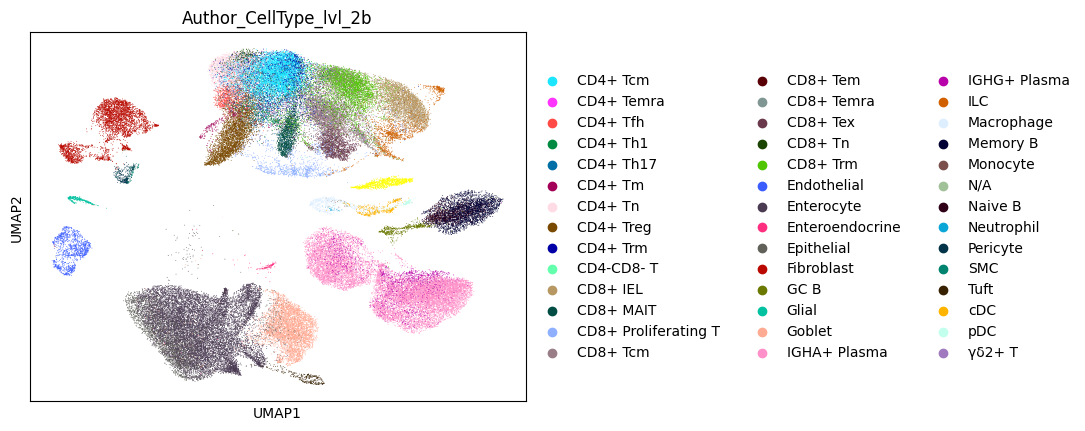

In [74]:
sc.pl.umap(adata_chen_TME, color=['Author_CellType_lvl_2b'])

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_rank_genes_grou

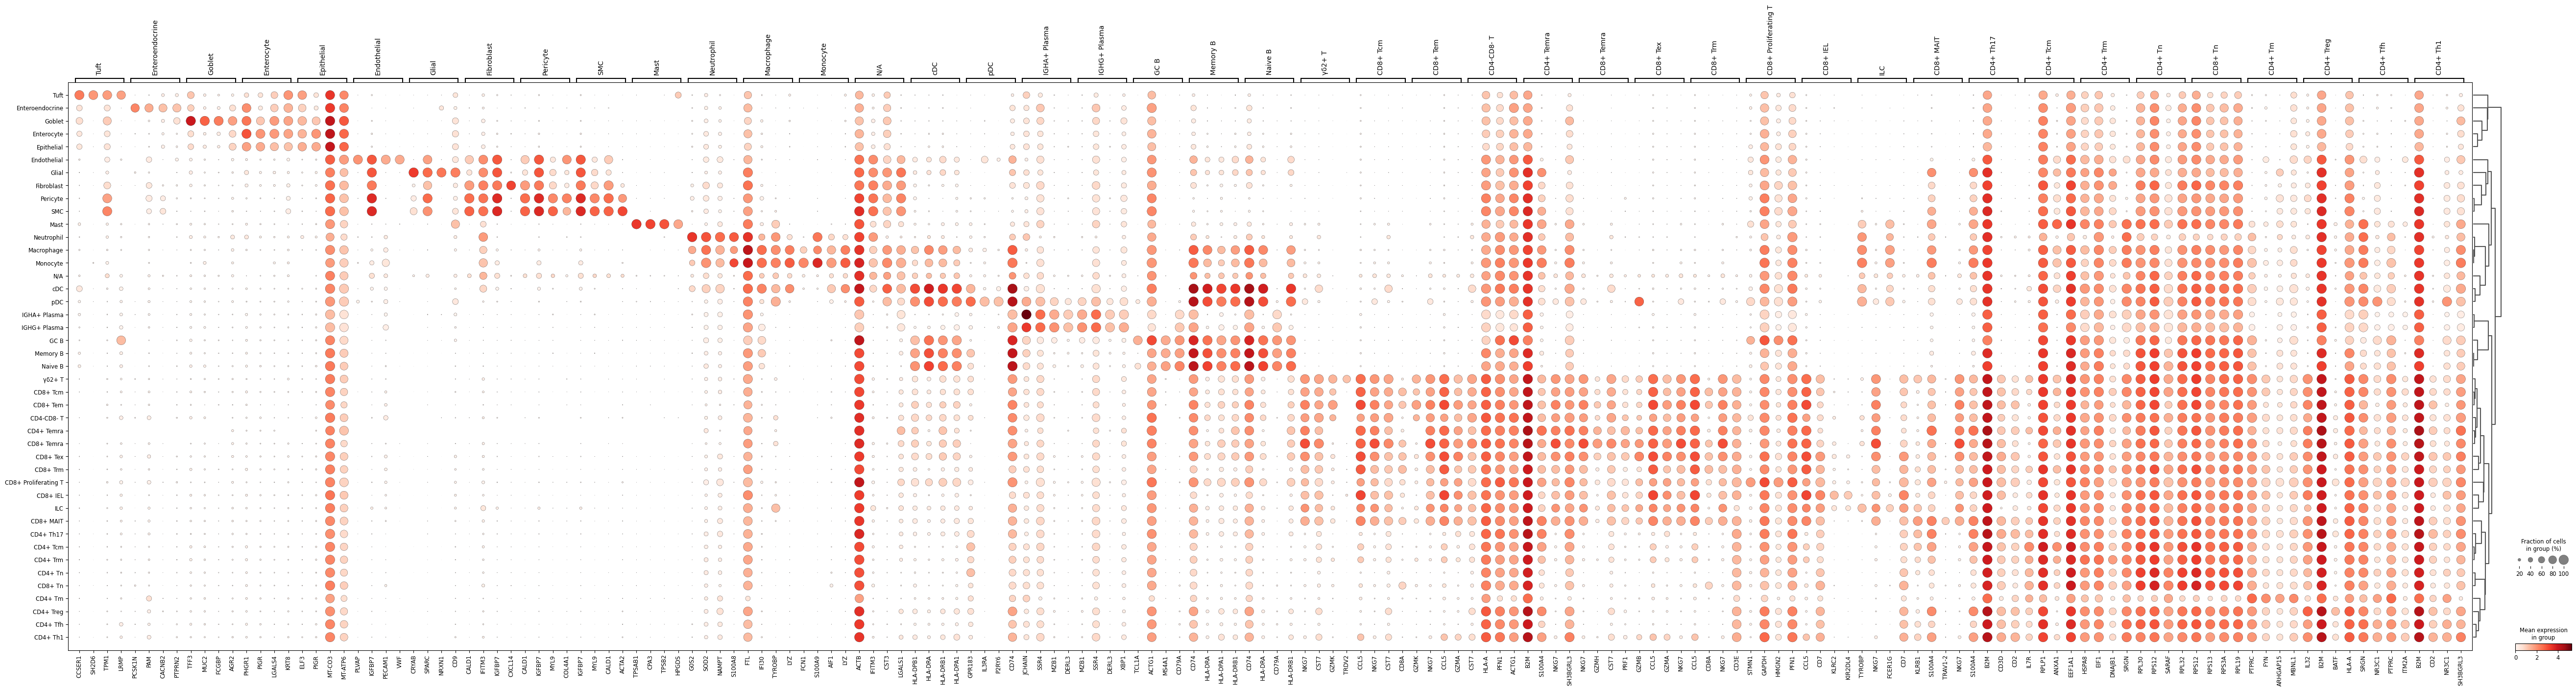

In [89]:
sc.tl.rank_genes_groups(adata_chen_TME, groupby='Author_CellType_lvl_2b', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(adata_chen_TME, groupby='Author_CellType_lvl_2b', n_genes=4)

In [11]:
for e in sorted(set(adata_chen_TME.obs['Author_CellType_lvl_2'])):
    print(f'\'{e}\' : \'\',')

'c01_CD4_Tn_CCR7' : '',
'c02_CD4_Tn_SELL' : '',
'c03_CD4_Tn_NR4A2' : '',
'c04_CD4_Tcm_ANXA1' : '',
'c05_CD4_Tcm_GPR183' : '',
'c06_CD4_Trm_HSPA1A' : '',
'c07_CD4_Th17_CTSH' : '',
'c08_CD4_Tfh_CXCL13_IL6ST' : '',
'c09_CD4_Th1_CXCL13_HAVCR2' : '',
'c10_CD4_Temra_GZMB' : '',
'c11_CD4_Treg_FOXP3' : '',
'c12_CD4_Treg_KLRB1' : '',
'c13_CD4_Treg_TNFRSF9' : '',
'c14_CD4_MT' : '',
'c15_CD8_Tn_CCR7' : '',
'c16_CD8_Tn_SELL' : '',
'c17_CD8_Tcm_GPR183' : '',
'c18_CD8_Tcm_ANXA1' : '',
'c19_CD8_Tem_CMC1' : '',
'c20_CD8_Tem_GZMK' : '',
'c21_CD8_Trm_XCL1' : '',
'c22_CD8_Trm_HSPA1B' : '',
'c23_CD8_Tex_LAYN' : '',
'c24_CD8_Temra_CX3CR1' : '',
'c25_CD8_Temra_TYROBP' : '',
'c26_CD8_MAIT_KLRB1' : '',
'c27_CD8_MAIT_SLC4A10' : '',
'c28_CD8_IEL_CD160' : '',
'c29_T_MKI67' : '',
'c30_gdT_TRDV2' : '',
'c31_DNT' : '',
'c33_ILC_GZMK' : '',
'c34_ILC_NR4A2' : '',
'c35_ILC_FCGR3A' : '',
'c36_ILC_SYNE2' : '',
'c37_ILC_SLC4A10' : '',
'c38_ILC_MKI67' : '',
'c39_NaiveB_TCL1A' : '',
'c40_NaiveB_IGHD' : '',
'c41_MemB_CD27' 

## Merge tumor cells to create final adata

In [160]:
dict_Identifier_to_lvl_1b_CellType = { tup.Identifier : tup.Author_CellType_lvl_1b for tup in adata_chen_TME.obs.itertuples() }
dict_Identifier_to_lvl_2b_CellType = { tup.Identifier : tup.Author_CellType_lvl_2b for tup in adata_chen_TME.obs.itertuples() }

for tup in adata_chen.obs[adata_chen.obs['Manual_CellType_lvl_1']=='Tumor epithelial'].itertuples():
    dict_Identifier_to_lvl_1b_CellType[tup.Identifier] = 'Tumor cell'
    dict_Identifier_to_lvl_2b_CellType[tup.Identifier] = 'Tumor cell'

In [146]:
adata_chen = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/Chen.MSI.preprocessed.NanoMnT.ManualAnnot.h5ad')

In [161]:
adata_chen.obs['Author_CellType_lvl_1b'] = [ dict_Identifier_to_lvl_1b_CellType[Identifier] for Identifier in adata_chen.obs['Identifier'] ]
adata_chen.obs['Author_CellType_lvl_2b'] = [ dict_Identifier_to_lvl_2b_CellType[Identifier] for Identifier in adata_chen.obs['Identifier'] ]

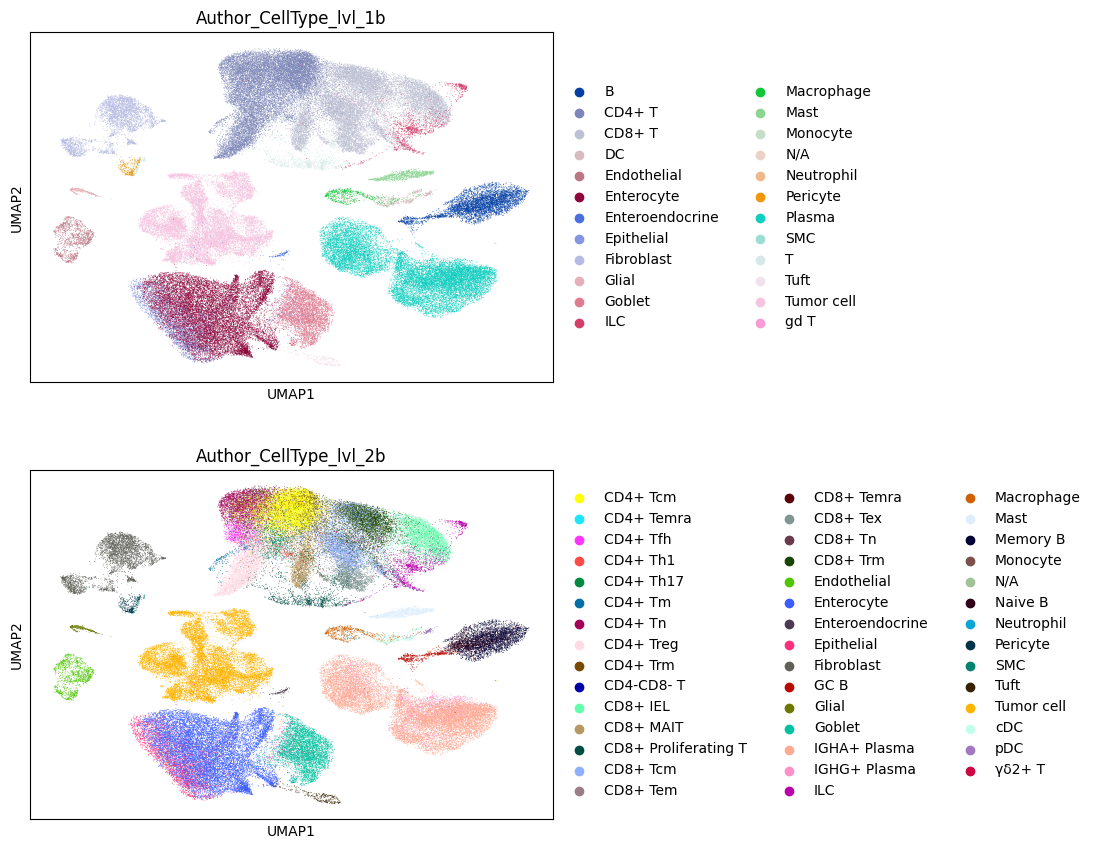

In [152]:
sc.pl.umap(adata_chen, color=['Author_CellType_lvl_1b', 'Author_CellType_lvl_2b'], ncols=1)

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


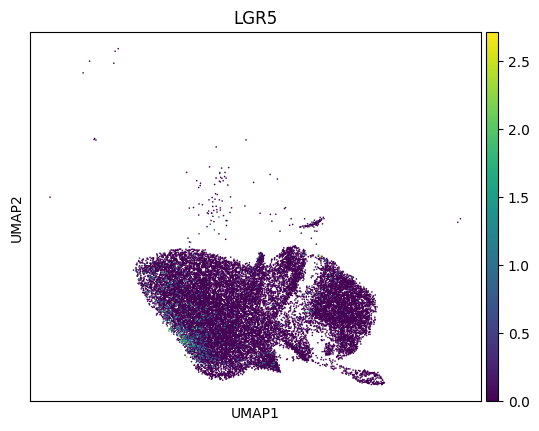

In [144]:
sc.pl.umap(adata_chen_TME[adata_chen_TME.obs['Author_CellType_lvl_1']=='Epi'], color=['LGR5'])

In [167]:
adata_chen.write('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/Chen.MSI.preprocessed.NanoMnT.AuthorAnnot.MSI_score_labeled.h5ad')